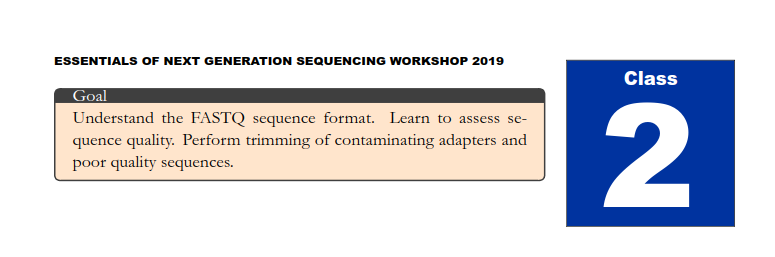
# Sequence Data: Formats, Quality, and Processing


#### 2.1 Familiarize yourself with the FASTQ sequence format


The FASTQ format is the most commonly utilized way of outputting nucleotide sequence and associated quality data. 

Therefore, it is important that you understand the information contained within FASTQ files. Before we start using data for downstream applications, we will take a look at a repre-sentativefile, andexamineafewsequence-reads.

**It is vitally important that you do not try to open a sequence file either by double-clicking on it or within a text editor**. The huge size of manysequence files will cause your machine to “choke” and you may end up having to perform a forcedrestart. Instead we can use our commands—less, more, head—to look at a few records at a time.

Change to the formats directory with the command in the following cell:

In [8]:
cd formats

bash: cd: formats: No such file or directory


: 1

First, let’s look at 20 lines from the top of one of the sequence files:

In [7]:
head -n 20 test/test

test


This will return five FASTQ records (four lines per sequence). Line 1 contains the sequence identifier (represented by the coordinates on the flowcell - see Day 2 Appendix); line 2 is the nucleotide sequences; line 3 has a ’+’ symbol; and line 4, the quality information. The first three lines are self-explanatory. Only line 4 requires further elaboration.



The characters on this line have a one-to-one correspondence with the nucleotides on line 2 and represent the quality of each base call. For data compression purposes, the quality scores (Phred score+33 format) are represented as ASCII characters. To arrive at the Phred quality score, simply use theASCII table in the appendix to convert the ASCII character to its corresponding decimal number andthen subtract 33. This gives you a quality score in Phred format (see the Day 2 Appendix for detailed information on how to interpret Phred scores).


As a general rule of thumb, however, Phred scores > 30 (Phred30) are considered high quality andsuitable for analysis. One should avoid using sequences that have too many bases below Phred20. A quick glimpse at the ASCII table will show you that Phred30+33 corresponds to the ASCII character for 63 which is the “?” (question mark). Thus,ideally,one wants to see sequences having quality values represented mostly by capitalized letters (A through H), and the “?” and “@” symbols.

+ Examine, the five records retrieved using theheadcommand to see if the sequences look tohave an acceptable quality.

+ Next we’ll uselessto scroll through some additional records, one page at a time, to get a quicksense of the overall quality:

In [ ]:
less Br80_S1_L001_R1_001.fastq






+ Press the Space bar to keep advancing the page, looking for sequences with the large numbers of capitalized letters. You should see a number of such records but sequences with Phred30 values or higher throughout their entire length are rare. 

+ When you are done, quit **less** using Ctrl+C.

#### 2.2 Assess overall sequence quality with FastQC

**fastqc** is an application that provides a quality control report, which can spot problems originating either in the sequencer or in the starting library material. It can be run as an interactive java application, or in a non-interactive mode as part of a larger analysis pipeline. We will use the interactive, graphics-based version.

**fastqc** accepts inputs in the form of FASTQ, BAM or SAM files. It then uses plots to display several different sequence quality metric.

www.bioinformatics.babraham.ac.uk/projects/fastqc


We will use the fastqc program in the formats directory to look at some metrics of “good” and “bad” sequence outputs. The first data set we will interrogate represents a fungal genome that was sequence dusing MiSeq technology, with 2 x 250bp paired end reads.

##### 2.2.1  X11

The X Window System, **X11** , is a framework for building graphical user interfaces such as fastqc.
Software developers use **X11** to realize concepts that rely on visualization.

To render (i.e. “see”) a GUI program, we need a special server installed on our local machine called an **X server**. This is natively installed on most Linux distributions and older versions of Mac. Newer Mac versions and Windows will need a liaison program to handle this protocol.

We will beusing **X11-forwarding** to interact with the **fastqc** program on the virtual machine from your local machine. 
**X11-forwarding** provides a channel to the **X server** running on your local machine, allowing **fastqc** to interact with the keyboard, mouse, and display.

#### **Instructions for Windows machines:**

We will be using an application called **VcXsrv** as our **X server**. If you are using a lab machine, you should already have this installed. Otherwise, download, then install it from here:

https://sourceforge.net/projects/vcxsrv/

+ Run XLaunch from your start menu.


+  VcXsrv offers many configuration options. We will leave them with their default values. Click through:  .  You should see a new icon in your notification area, this is **VcXsrv**.

+ Open PuTTY. We need to configure it for **X11-forwarding**.

+ On the left panel, navigate through the menu: . On this page, check the box for ***X11-forwarding***.
    
+ Return to the  configuration on the left panel. Save this change by clicking on , then clicking  to its right.

+ Log in to the virtual machine as before. Now try: